LOGISTICS / SIGMOID  REGRESSION IS A CLASSIFICATION METHOD FOR SUPERVISED LEARNING IN MACHINE LEARNING
A LOGISTICS OR SIGMOID CURVE IS A PROBABILITY CURVE.
PROBABILITY OF AN EVENT OF DEFAULT
A THRESHOLD IS DETERMINED BELOW WHICH THE EVENT WILL HAPPEN AND ABOVE WHICH EVENT WILL NOT HAPPEN 
AGAIN ITS A TRAIN AND TEST MODEL
WE USE SCALER TO BRING OUTLIERS UNDER CONTROL
WE USE CONFUSION MATRIX TO GIVE AN ACCURACY PERCENTAGE


In [1]:
# IMPORTING NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# READING DATA

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd/content/drive/My Drive/Colab Notebooks/csv_practice

/content/drive/My Drive/Colab Notebooks/csv_practice


In [7]:
data=pd.read_csv("SocialNetworkAds.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
# breaking the independent variables as x and dependent variables as y
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

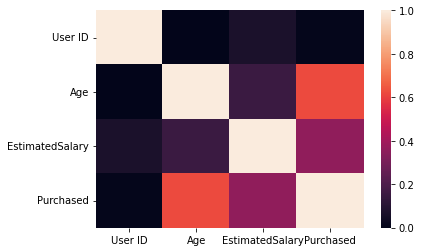

In [11]:
# check the correlation using heatmap
sns.heatmap(data.corr())

In [12]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
# scaling 
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
X_train=sc_x.fit_transform(X_train)
x_test=sc_x.transform(x_test)

In [14]:
# logistics regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [15]:
# predicting y values

y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


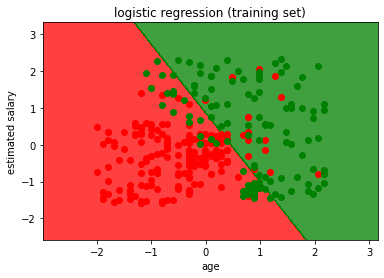

In [20]:
# colour map of training set

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(("red","green")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(("red","green"))(i),label=j)
plt.title("logistic regression (training set)")
plt.xlabel("age")
plt.ylabel("estimated salary")
plt.legend
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


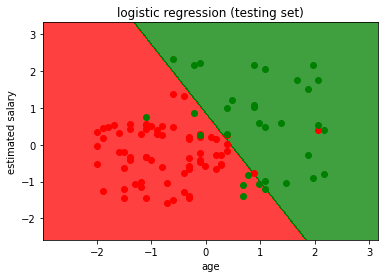

In [31]:
# colour map of testing set

from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(("red","green")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(("red","green"))(i),label=j)
plt.title("logistic regression (testing set)")
plt.xlabel("age")
plt.ylabel("estimated salary")
plt.legend
plt.show()

In [22]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 8, 24]])

In [29]:
print("Accuracy of Model",(cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])*100)

Accuracy of Model 89.0


In [30]:
print("Error Percentage of Model",(cm[1,0]+cm[0,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])*100)

Error Percentage of Model 11.0
